In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Lecture des données 

In [3]:
df = pd.read_csv("housing_dataset.csv")

In [4]:
del df["Id"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Extraction des données catégorielles

In [93]:
categorical_df = df.select_dtypes(include =['object'])
#categorical_df['SalePrice'] = df["SalePrice"]

In [94]:
categorical_df.shape

(1460, 43)

In [95]:
categorical_df.isnull().sum().nlargest(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
MSZoning           0
Street             0
LotShape           0
LandContour        0
dtype: int64

<AxesSubplot:>

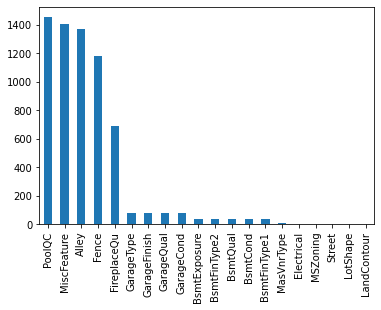

In [87]:
categorical_df.isnull().sum().nlargest(20).plot.bar()

### Supression des valeurs manquantes 

In [96]:
categorical_df_v1 = categorical_df.dropna(axis =1)
categorical_df_v1.shape

(1460, 27)

In [97]:
categorical_df_v1.isnull().sum().sum()

0

In [12]:
from itertools import product
import scipy.stats as ss

In [98]:
def perform_chi2_test(data = categorical_df_v1):
    var_1 = data.columns
    var_2 = data.columns
    categ_var_prod = list(product(var_1,var_2, repeat =1))
    categ_var_prod
    res = []
    for i in categ_var_prod:
        if i[0]!=i[1]:
            _crosstab = pd.crosstab(data[i[0]],data[i[1]])
            chi2_pval = list(ss.chi2_contingency(_crosstab))[1]
            res.append((i[0],i[1],chi2_pval))
    chi_test_output = pd.DataFrame(res, columns = ['var1','var2','coeff'])
    chi_test_output = chi_test_output.pivot(index ='var1',columns='var2',values ="coeff")
    return chi_test_output
    

In [99]:
chi_ttest_output = perform_chi2_test()

In [100]:
chi_ttest_output

var2,BldgType,CentralAir,Condition1,Condition2,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,...,LotShape,MSZoning,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
var1,,,,,,,,,,,,,,,,,,,,,
BldgType,NaN,3.533808e-26,4.238166e-04,2.143323e-18,1.180326e-11,2.525636e-25,1.070066e-19,3.074387e-27,5.246300e-37,1.497662e-02,...,2.079020e-05,1.747029e-38,1.312756e-173,2.898240e-12,2.604886e-01,3.143538e-02,3.332217e-23,3.697420e-07,1.626828e-04,0.995462
CentralAir,3.533808e-26,NaN,2.401086e-01,5.390213e-02,9.726205e-13,5.525330e-25,2.966661e-33,3.350131e-29,3.847231e-41,7.871584e-03,...,1.775252e-04,1.221703e-27,5.903339e-37,7.508133e-37,9.915974e-01,9.344373e-02,2.620041e-04,1.005091e-04,6.571372e-02,1.000000
Condition1,4.238166e-04,2.401086e-01,NaN,1.764768e-73,3.644702e-01,6.052846e-10,1.924073e-04,2.593540e-05,2.614336e-05,7.986745e-01,...,1.138157e-06,1.252606e-03,5.557464e-42,6.950607e-05,3.653417e-06,1.716939e-05,7.515057e-01,1.206412e-01,1.131990e-07,0.999998
Condition2,2.143323e-18,5.390213e-02,1.764768e-73,NaN,1.908248e-87,7.737573e-13,3.395425e-01,7.694682e-01,1.395726e-01,1.000000e+00,...,7.591283e-01,1.046455e-02,4.622627e-01,4.992303e-02,1.000000e+00,7.331046e-133,7.173339e-01,7.367288e-01,9.999995e-01,1.000000
ExterCond,1.180326e-11,9.726205e-13,3.644702e-01,1.908248e-87,NaN,2.990887e-27,3.204447e-05,1.428605e-02,4.472942e-14,8.146456e-25,...,4.856957e-01,9.589790e-06,2.601796e-13,1.584921e-13,9.990555e-01,2.140209e-07,1.813475e-02,6.468429e-06,9.813521e-01,0.997696
ExterQual,2.525636e-25,5.525330e-25,6.052846e-10,7.737573e-13,2.990887e-27,NaN,1.172291e-95,1.989427e-97,8.389011e-122,5.410642e-07,...,2.447210e-10,3.212044e-49,6.512742e-184,2.619444e-22,7.370505e-03,3.568594e-16,3.071252e-46,1.662980e-53,4.685562e-33,0.893703
Exterior1st,1.070066e-19,2.966661e-33,1.924073e-04,3.395425e-01,3.204447e-05,1.172291e-95,NaN,0.000000e+00,1.970391e-122,1.303283e-06,...,3.341831e-03,1.080134e-24,8.393905e-238,1.299309e-15,9.011149e-47,9.979190e-16,2.028676e-28,6.753735e-16,9.514722e-01,0.975986
Exterior2nd,3.074387e-27,3.350131e-29,2.593540e-05,7.694682e-01,1.428605e-02,1.989427e-97,0.000000e+00,NaN,3.144874e-120,2.297088e-05,...,4.787187e-04,4.408208e-27,0.000000e+00,1.615513e-12,1.019953e-12,2.529831e-22,5.394584e-24,9.262228e-15,9.721226e-01,0.978769
Foundation,5.246300e-37,3.847231e-41,2.614336e-05,1.395726e-01,4.472942e-14,8.389011e-122,1.970391e-122,3.144874e-120,NaN,3.800891e-10,...,7.291547e-10,4.071249e-54,2.441838e-214,7.973424e-32,9.940215e-01,1.117915e-08,2.161004e-30,1.184273e-23,1.647394e-01,0.934547


<AxesSubplot:title={'center':'Correlation'}, xlabel='var2', ylabel='var1'>

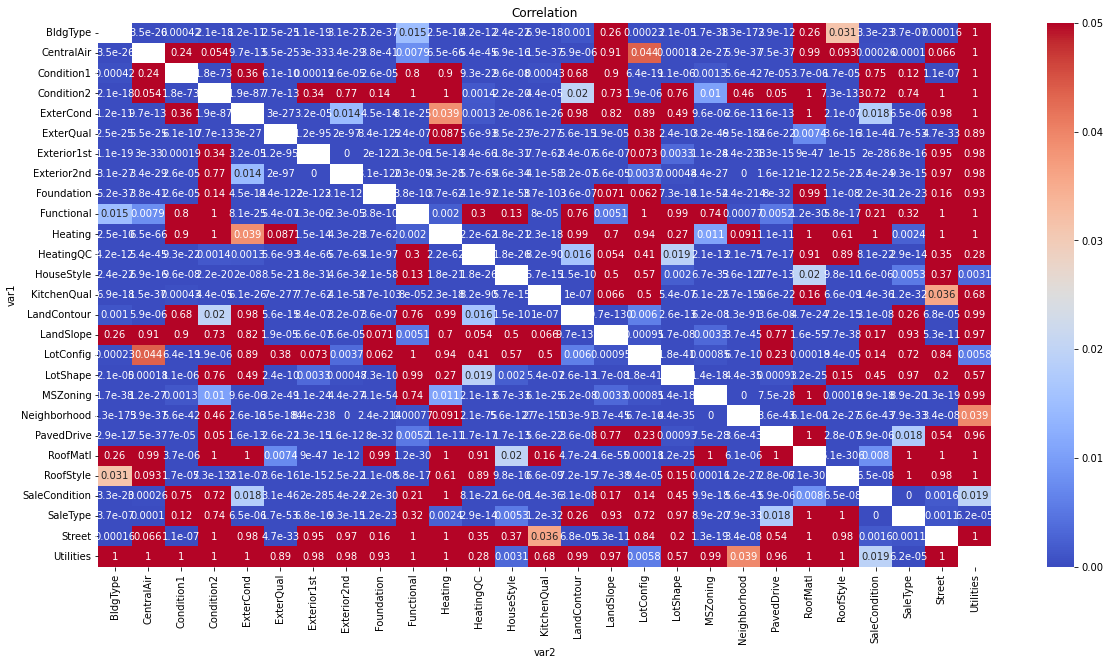

In [102]:
plt.figure(figsize= (20,10))
plt.title('Correlation')
sns.heatmap(chi_ttest_output,vmin =0, cmap = "coolwarm",vmax = .05, annot = True)

# Extraction des données numériques 

In [18]:
numerical_df = df.select_dtypes(include =['int64'])

In [19]:
numerical_df.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [20]:
numerical_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


## Feature Selection

### Correaltion entre différentes variables numériques

In [21]:
correlation_num =numerical_df.corr()

In [124]:
correlation_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


### heatmap de la matrice de corrélation (r>.5)

<AxesSubplot:title={'center':'Correlation'}>

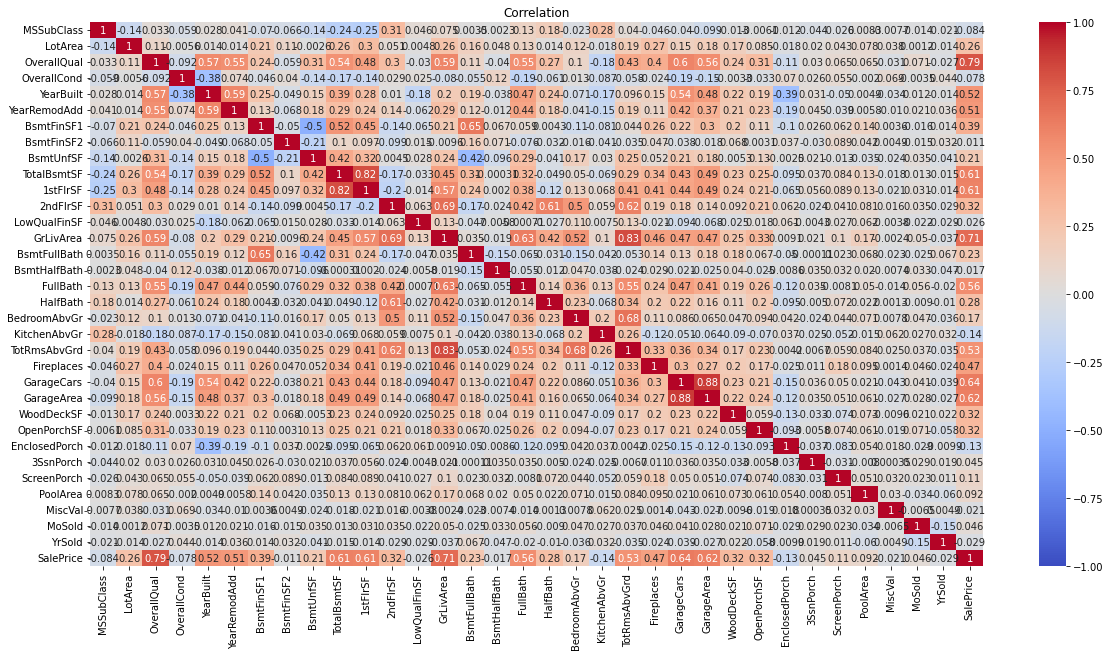

In [125]:
plt.figure(figsize= (20,10))
plt.title('Correlation')
sns.heatmap(correlation_num,vmin = -1, cmap = "coolwarm",vmax = 1, annot = True)

### Focus sur la correlation entre la target et les autres features

In [119]:
def corr_feature_selector(threshold, target = "SalePrice",corr = correlation_num):
    target_corr= corr[corr[target].abs()>=threshold][target]
    return target_corr, target_corr.axes[0].to_list()


In [173]:
target_corr, corr_feat_list =corr_feature_selector(.5)
corr_feat_list

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

### Heatmap de la corrélation entre ces 11 variables 

<AxesSubplot:title={'center':'Correlation'}>

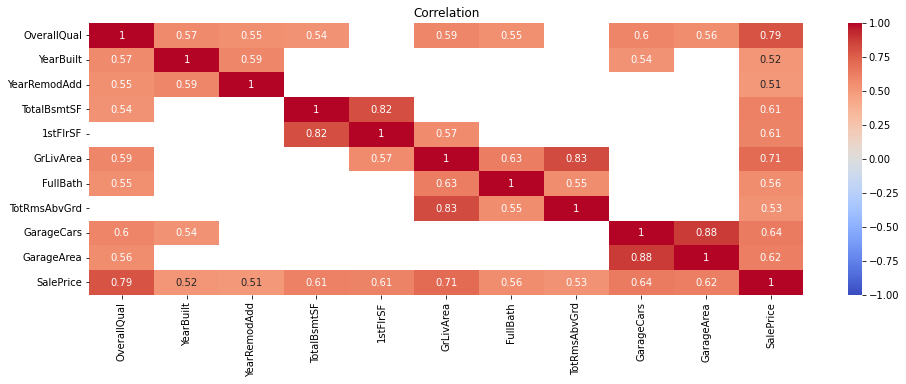

In [127]:
plt.figure(figsize= (16,5))
top_11_num_corr = top_11_numerical_df.corr()
plt.title('Correlation')
sns.heatmap(top_11_num_corr[top_11_num_corr.abs()>.5],vmin = -1,cmap = "coolwarm",vmax = 1, annot = True, robust=True)

In [121]:
target_corr.nlargest(7)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

### Liste des variables numériques ayant une corrélation supéireure ou égale à 0.5:
- OverallQual
- YearBuilt
- YearRemodAdd
- TotalBsmtSF
- 1stFlrSF 
- GrLivArea
- FullBath
- TotRmsAbvGrd
- GarageCars
- GarageArea


### Barplot des variables numérriques ayant une corrélation supérieure à 0.5 avec la target 

<AxesSubplot:>

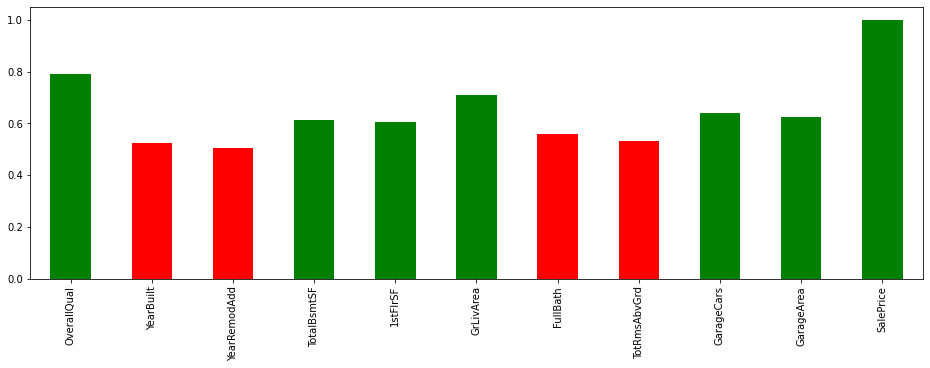

In [122]:
target_corr.plot.bar(figsize =(16,5), color=np.where(target_corr.values>.6,"green","red"))

### Toutes ces 10 variables évoluent dans le même sens que le SalePrice car corrélation positive

### Focus sur le sous-ensemble de données 11 variables 

In [28]:
top_11_numerical_df = df[feat_list]

In [29]:
top_11_numerical_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


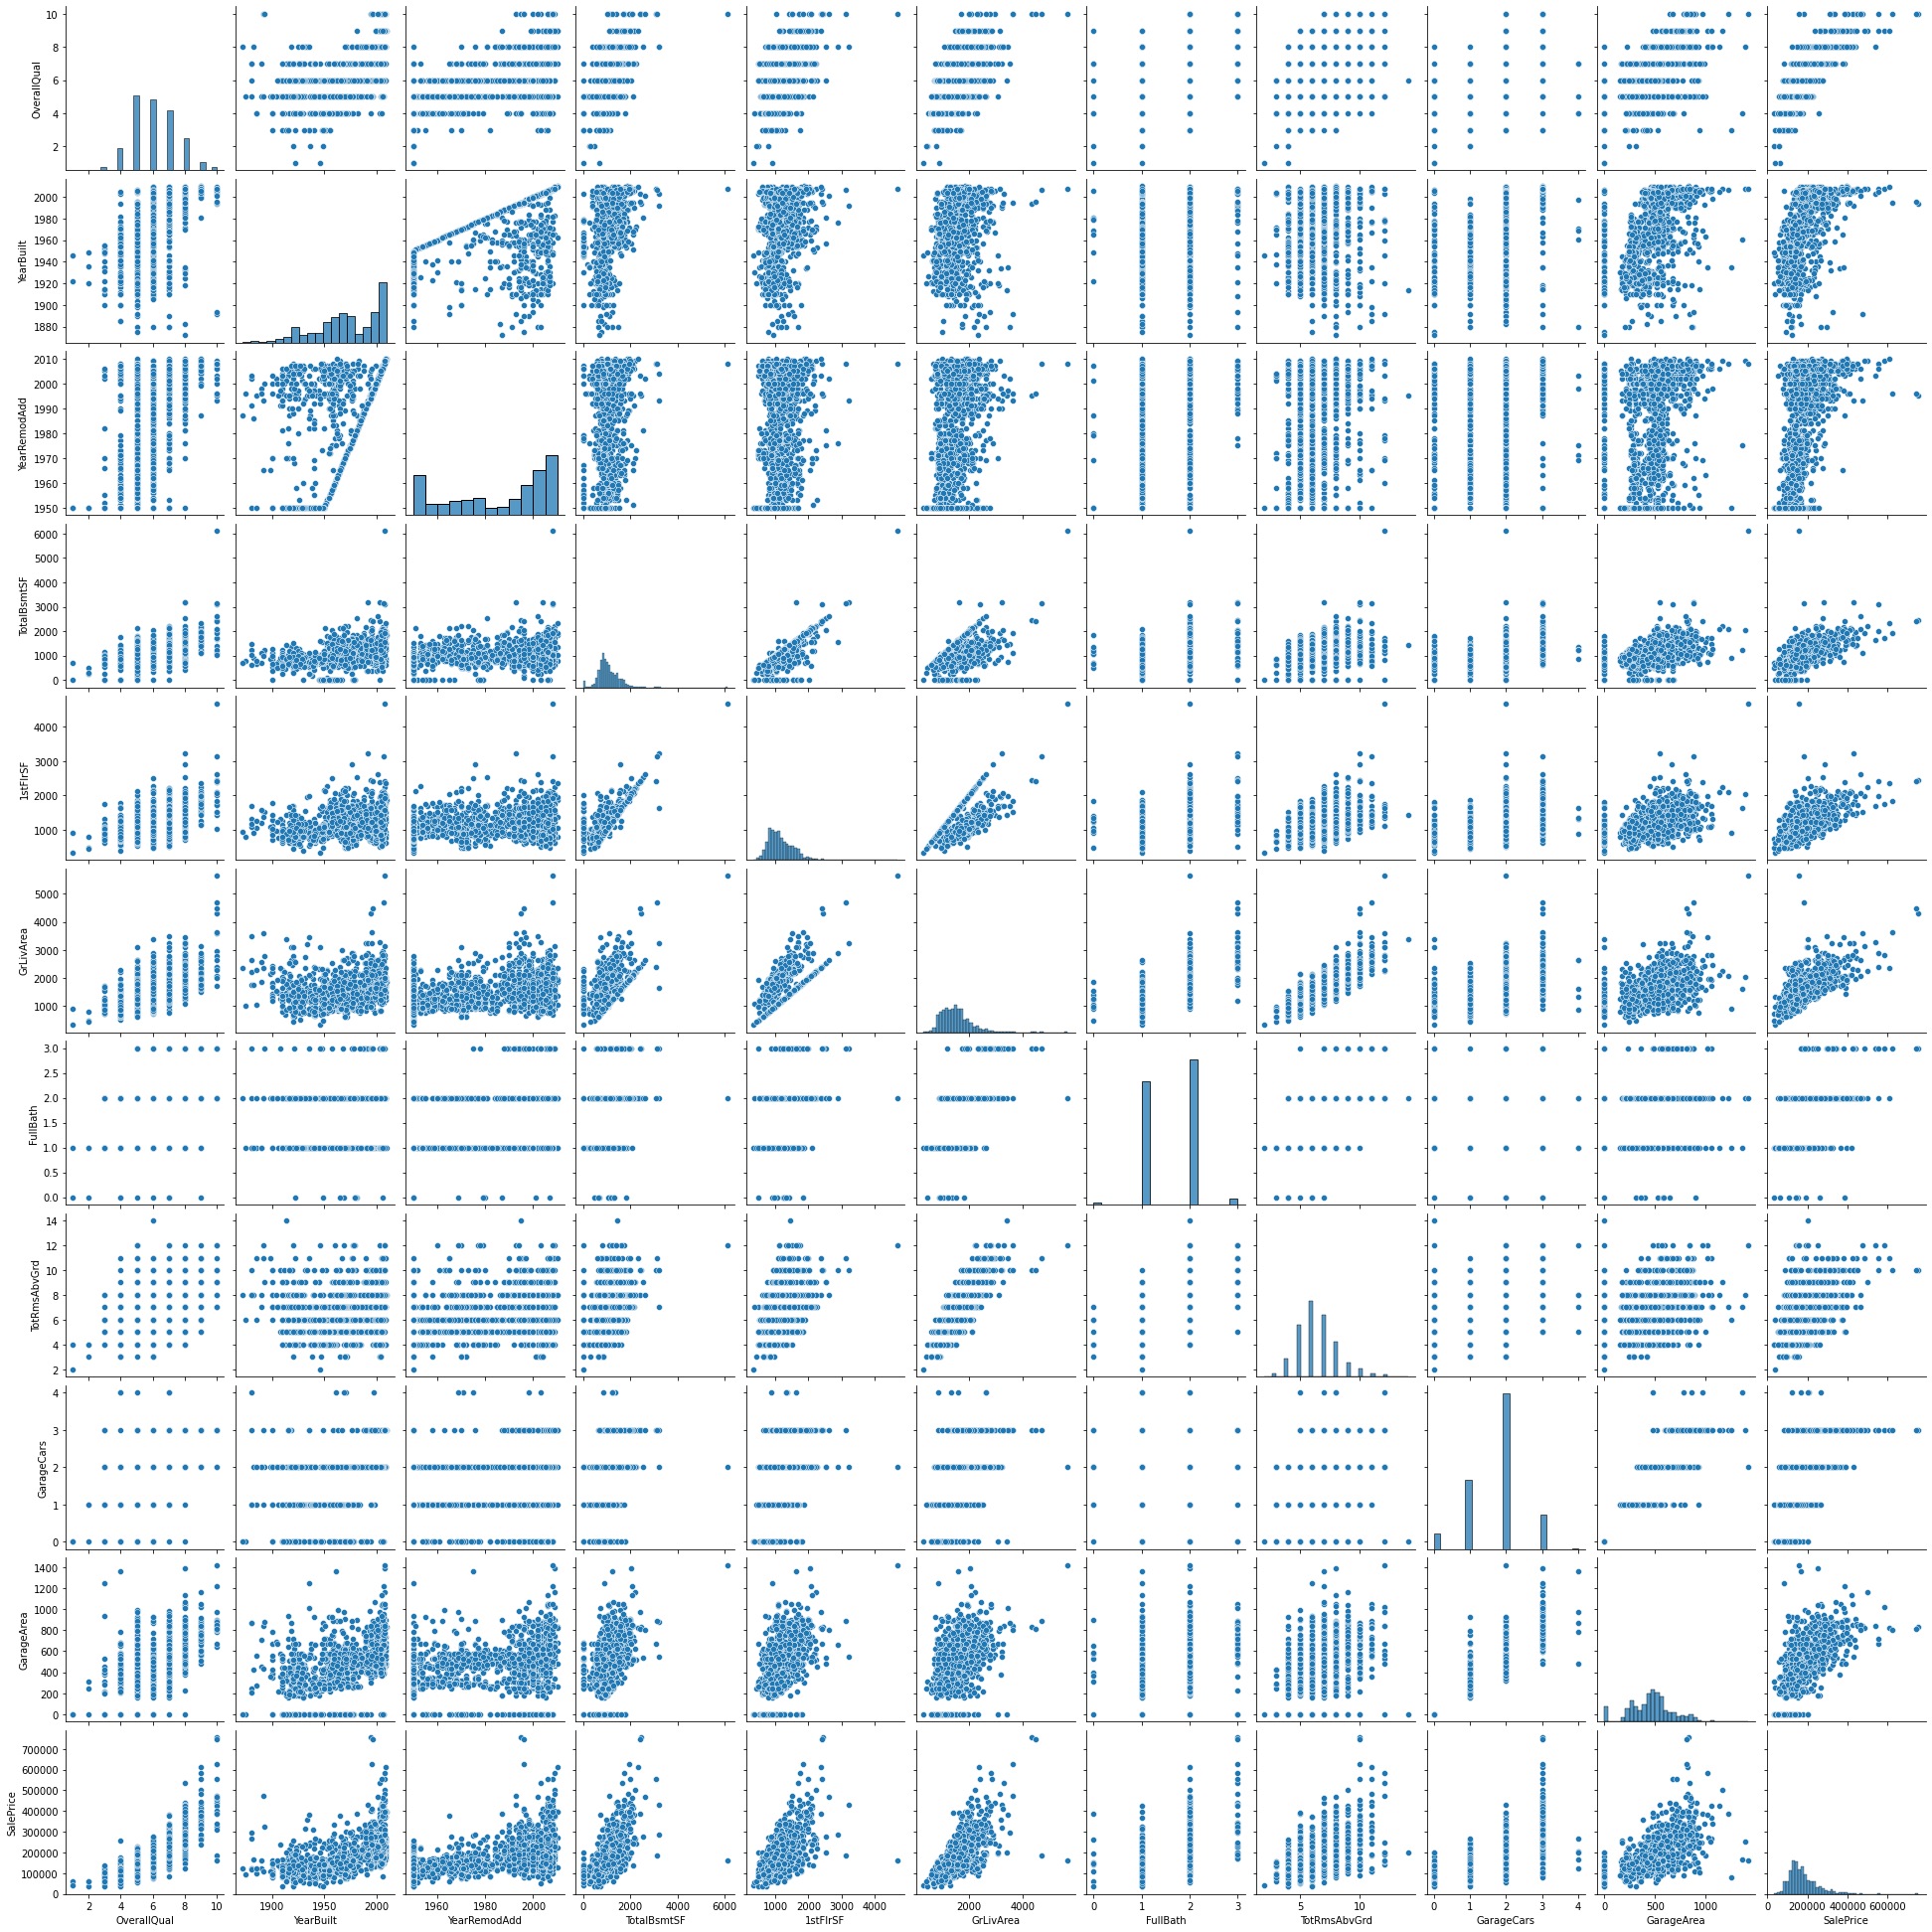

In [30]:
sns.pairplot(top_11_numerical_df)

In [32]:
!pip install -U scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\DANSO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## RandomForest regrssor

In [165]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [148]:
def rf_features_selector(df_arg,top_n,target_name ="SalePrice"):
    seed = np.random.seed(10)
    #features = ["Conductivity",'Discharge','pH','O2','Turbidity','Temperature','Chlorides','Sodium']
    #df_w = df_arg.copy()
    features = [col for col in df_arg.columns if col!=target_name]
    X = df_arg.copy()[features]
    y = df_arg[target_name].values
    model = RandomForestRegressor(random_state = seed)
    model.fit(X,y)
    #get feaures importance
    importance = model.feature_importances_
    indices = np.argsort(importance)
    feat_importances = pd.Series(importance, index=X.columns)
    plot = feat_importances.nlargest(top_n).plot(kind='barh', figsize =(10,5))
    plt.xlabel('importance')
    rf_features = pd.DataFrame(feat_importances.nlargest(top_n)).axes[0].tolist()
    return plot, rf_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'GarageCars',
 'GarageArea',
 'YearBuilt',
 'YearRemodAdd',
 'FullBath',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'OverallCond']

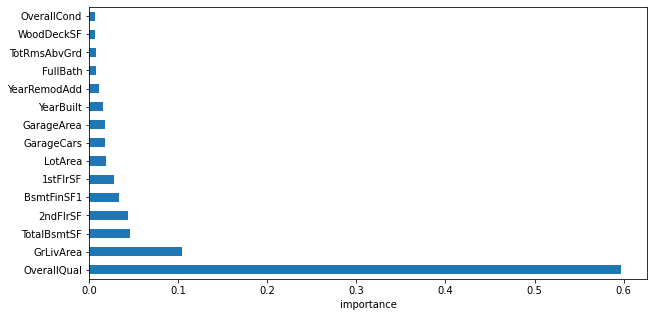

In [172]:
plot, feat = rf_features_selector(numerical_df,15)
feat

### LasssoRegression

In [160]:
def lassoReg_feat_selector(df_arg=numerical_df,target_name ="SalePrice"):
    np.random.seed(10)
    features = [col for col in df_arg.columns if col!=target_name]
    X = df_arg.copy()[features]
    y = df_arg[target_name].values
    estimator = LassoCV(cv=5)
    sfm = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=None)
    sfm.fit(X,y)
    feature_idx = sfm.get_support()
    Lasso_features = X.columns[feature_idx].tolist()
    return Lasso_features

In [162]:
lasso_feat_list = lassoReg_feat_selector()
lasso_feat_list

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'MiscVal']

### Recursive feature selection

In [169]:
def rfe_feature_selector(df_arg= numerical_df,target_name ="SalePrice"):
    np.random.seed(10)
    features = [col for col in df_arg.columns if col!=target_name]
    X = df_arg.copy()[features]
    y = df_arg[target_name].values
    rfe= RFE(estimator=LinearRegression(),n_features_to_select=15)
    rfe.fit(X,y)
    rfe_support = rfe.get_support()
    rfe_feat = X.loc[:,rfe_support].columns.to_list()
    return rfe_feat
    

In [170]:
rfe_feat_list = rfe_feature_selector()
rfe_feat_list


['OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageCars']

In [202]:
from collections import Counter
combined_feat_list  =rfe_feat_list+lasso_feat_list+rfe_feat_list+corr_feat_list
feat_freq= Counter(combined_feat_list)
feat_freq_df = pd.DataFrame({"Feature":feat_freq.keys(),"Frequence":feat_freq.values()})
feat_freq_df.sort_values("Frequence", ascending =False)

,Feature,Frequence
4,TotalBsmtSF,4
8,GrLivArea,4
0,OverallQual,3
6,2ndFlrSF,3
14,GarageCars,3
1,BsmtFinSF1,3
11,FullBath,3
5,1stFlrSF,3
3,BsmtUnfSF,3
2,BsmtFinSF2,3


<AxesSubplot:xlabel='Feature'>

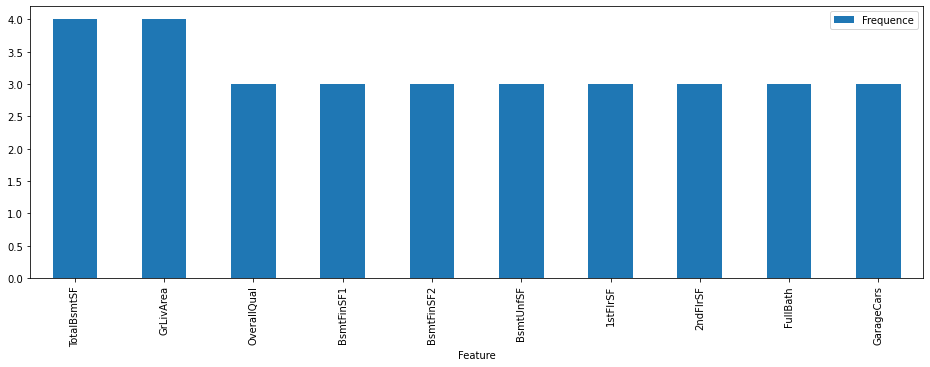

In [203]:
feat_freq_df.nlargest(10,"Frequence").plot.bar("Feature", figsize = (16,5))